<a href="https://colab.research.google.com/github/kmykz/ML-course-proj/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC

In [3]:
df = pd.read_csv('drive/MyDrive/data/ML-data.csv')
#df.head()
#Commented this section for pushing to github to avoid data leak

<ipython-input-3-36bc3b93c58d>:1: DtypeWarning: Columns (28,29,31,33,35,37,39,41,43,47,49,51,55,57,59,61,63,65,67,69,71,77,79,81,83,85,87,91,93,95,97,101,103,105,107,109,136,137,139,140,145,148,153,156,161,163,164,168,169,171,172) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('drive/MyDrive/data/ML-data.csv')


In [4]:
def get_correlation(column_name):
    return df[column_name].corr(df['Diabetes'])

In [5]:
print(get_correlation('[PVD)'))
print(get_correlation('[Stent)'))
print(get_correlation('[UTI)'))
print(get_correlation('Age_at_Exam'))
print(get_correlation('[Stroke)'))
print(get_correlation('BMI'))
print(get_correlation('FBS'))
print(get_correlation('HTN'))
print(get_correlation('[Cancer)'))
print(get_correlation('[Arrhythmia)'))
print(get_correlation('[Dialysis)'))
print(get_correlation('[ESRD)'))
print(get_correlation('[Sarcoma)'))
print(get_correlation('[NAFLD)'))
print(get_correlation('Year'))

0.04770732058582107
0.030160520300496964
-0.03719811871837726
0.19736368271324375
0.04494157895710559
0.19957524462389195
0.6017546483237239
0.20146933732699185
-0.019839979117554137
-0.020267519145971222
0.039561225373166885
0.043730664555074183
0.010625023531554525
0.011705509390944517
0.041751189846110245


In [6]:
#features to be kept
features = ['Patient_ID','Age_at_Exam', 'Sex', 'BMI', 'FBS', 'HTN', '[Cancer)', '[Arrhythmia)', '[Dialysis)', '[ESRD)', '[Sarcoma)', '[NAFLD)', 'Year', '[PVD)', '[Stent)', '[UTI)', 'Diabetes']
#filter the features
df_fil = df[features]
#for each patient_id keep the record with the minimum Year
df_fil = df_fil.sort_values(by=['Patient_ID', 'Year'])
df_fil = df_fil.drop_duplicates(subset=['Patient_ID'], keep='first')
#print dimentions of df_fil
print(df_fil.shape)
#print classes and their numbers for Diabetes
print(df_fil['Diabetes'].value_counts())
#drop Year
df_fil = df_fil.drop(columns=['Year', 'Patient_ID'])
# replace unknown/NA/Nan and null values with -1
df_fil = df_fil.fillna(-1)
df_fil['Sex'] = df_fil['Sex'].replace('Male', 0)
df_fil['Sex'] = df_fil['Sex'].replace('Female', 1)
#divide training/test 20/10/70 randomly for test,validation, train
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_fil, test_size=0.3, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=1/3, random_state=42)

(171619, 17)
Diabetes
0    145699
1     25920
Name: count, dtype: int64


<ipython-input-6-f99c1847ccd0>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fil['Sex'] = df_fil['Sex'].replace('Female', 1)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[['Age_at_Exam', 'BMI', 'FBS']] = scaler.fit_transform(df_train[['Age_at_Exam', 'BMI', 'FBS']])
df_test[['Age_at_Exam', 'BMI', 'FBS']] = scaler.transform(df_test[['Age_at_Exam', 'BMI', 'FBS']])
df_val[['Age_at_Exam', 'BMI', 'FBS']] = scaler.transform(df_val[['Age_at_Exam', 'BMI', 'FBS']])
#Use diabetes as target
y_train = df_train['Diabetes']
y_test = df_test['Diabetes']
y_val = df_val['Diabetes']
#drop Diabetes from training/test
df_train = df_train.drop(columns=['Diabetes'])
df_test = df_test.drop(columns=['Diabetes'])
df_val = df_val.drop(columns=['Diabetes'])
print(y_train.value_counts())
smote = SMOTENC(categorical_features=['Sex', 'HTN', '[Cancer)', '[Arrhythmia)', '[Dialysis)', '[ESRD)', '[Sarcoma)', '[NAFLD)', '[PVD)', '[Stent)', '[UTI)'], random_state=42)
df_train, y_train = smote.fit_resample(df_train, y_train)
print(y_train.value_counts())

Diabetes
0    102089
1     18044
Name: count, dtype: int64
Diabetes
0    102089
1    102089
Name: count, dtype: int64


F1 for k = 3 is 0.5511071348691567
F1 for k = 5 is 0.5499892496237369
F1 for k = 7 is 0.5544371987524809
F1 for k = 10 is 0.579374624173181
Best F1 is 0.579374624173181 for k = 10


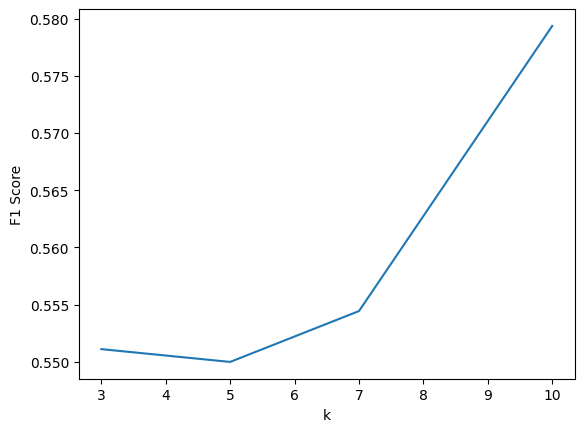

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     14469
           1       0.49      0.73      0.58      2693

    accuracy                           0.84     17162
   macro avg       0.72      0.79      0.74     17162
weighted avg       0.87      0.84      0.85     17162



In [28]:
#standardize BMI, Age, FBS

#drop Diabetes from training/test

#use KNN to predict Diabetes, use values [3,5,7,10]
from sklearn.neighbors import KNeighborsClassifier
k_vlas = [3,5,7,10]
f1s = []
best_f1 = 0
best_k = 0
for k in k_vlas:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_train, y_train)
    y_pred = knn.predict(df_val)
    #print accuracy
    res = f1_score(y_val, y_pred)
    f1s.append(res)
    print("F1 for k = {} is {}".format(k, res))
    if res > best_f1:
        best_f1 = res
        best_k = k
print("Best F1 is {} for k = {}".format(best_f1, best_k))
#visualize

plt.plot(k_vlas, f1s)
plt.xlabel('k')
plt.ylabel('F1 Score')
plt.show()
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(df_train, y_train)
y_pred = knn.predict(df_test)
print(classification_report(y_test, y_pred))

In [13]:
#use logistic regression with gridsearch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

best_f1 = 0
best_model = None
best_params = None
for c in param_grid['C']:
    for penalty in param_grid['penalty']:
        solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
        lr = LogisticRegression(C=c, penalty=penalty, random_state=42,solver=solver)
        lr.fit(df_train, y_train)
        y_pred = lr.predict(df_val)
        res = f1_score(y_val, y_pred)
        if res > best_f1:
            best_f1 = res
            best_model = lr
            best_params = {'C': c, 'penalty': penalty}
print("Best F1 is {} for params {}".format(best_f1, best_params))
y_pred = best_model.predict(df_test)
print(classification_report(y_test, y_pred))

Best F1 is 0.6237683795664696 for params {'C': 0.001, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     14469
           1       0.51      0.78      0.62      2693

    accuracy                           0.85     17162
   macro avg       0.73      0.82      0.76     17162
weighted avg       0.89      0.85      0.86     17162



F1 for depth = None is 0.5717437264454454
F1 for depth = 2 is 0.6532251174711662
F1 for depth = 4 is 0.6760279001468429
F1 for depth = 8 is 0.6865141955835962
Best F1 is 0.6865141955835962 for depth = 8


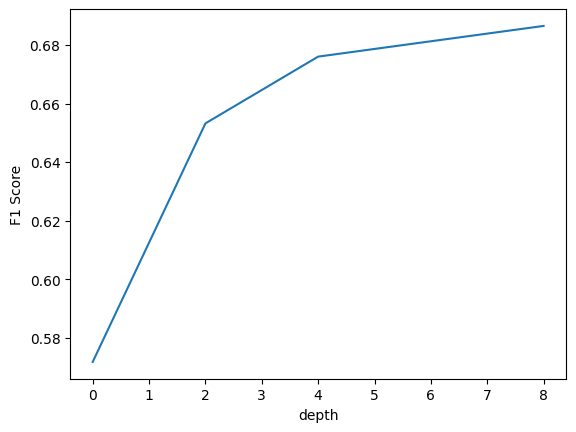

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     14469
           1       0.70      0.66      0.68      2693

    accuracy                           0.90     17162
   macro avg       0.82      0.80      0.81     17162
weighted avg       0.90      0.90      0.90     17162



In [33]:
#use decision trees to predict target
from sklearn.tree import DecisionTreeClassifier
max_dep = [None,2,4,8]
f1s = []
best_f1 = 0
best_depth = 0
for depth in max_dep:
    dt = DecisionTreeClassifier(max_depth=depth,random_state=42)
    dt.fit(df_train, y_train)
    y_pred = dt.predict(df_val)
    #print accuracy
    res = f1_score(y_val, y_pred)
    f1s.append(res)
    print("F1 for depth = {} is {}".format(depth, res))
    if res > best_f1:
        best_f1 = res
        best_depth = depth
print("Best F1 is {} for depth = {}".format(best_f1, best_depth))
#visualize
max_dep[0] = 0
plt.plot(max_dep, f1s)
plt.xlabel('depth')
plt.ylabel('F1 Score')
plt.show()
dt = DecisionTreeClassifier(max_depth=best_depth,random_state=42)
dt.fit(df_train, y_train)
y_pred = dt.predict(df_test)
#print accuracy
print(classification_report(y_test, y_pred))

In [8]:
#performing random forests
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

rand_for = RandomForestClassifier(n_estimators=100, random_state=42)
rand_for.fit(df_train, y_train)
y_pred = rand_for.predict(df_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     14469
           1       0.65      0.64      0.65      2693

    accuracy                           0.89     17162
   macro avg       0.79      0.79      0.79     17162
weighted avg       0.89      0.89      0.89     17162



In [9]:
#performing XGboost
xg_classifier = xgb.XGBClassifier()
#remove [ from column names
df_train.columns = df_train.columns.str.replace('[', '')
df_test.columns = df_test.columns.str.replace('[', '')
xg_classifier.fit(df_train, y_train)
y_pred = xg_classifier.predict(df_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     14469
           1       0.70      0.65      0.68      2693

    accuracy                           0.90     17162
   macro avg       0.82      0.80      0.81     17162
weighted avg       0.90      0.90      0.90     17162



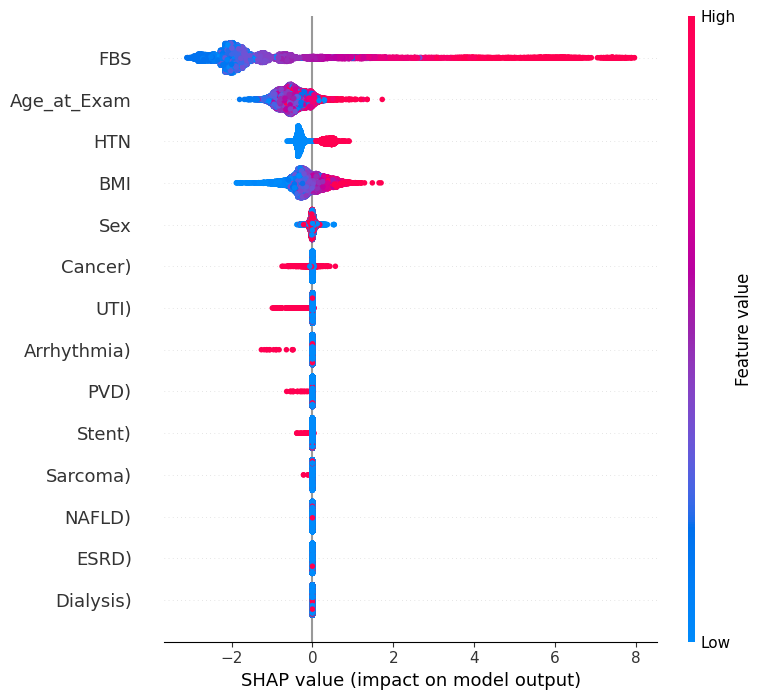

In [10]:
#perform shap analysis on the xgboost classifier
import shap
shap_values = shap.TreeExplainer(xg_classifier).shap_values(df_test)
shap.summary_plot(shap_values, df_test)